In [71]:
import pandas as pd
from pandas import read_csv
import numpy as np
import seaborn as sns
import matplotlib
import matplotlib.pyplot as plt
from sklearn.preprocessing import LabelEncoder
from sklearn import preprocessing
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, f1_score, precision_score, recall_score
from sklearn import tree
from sklearn.naive_bayes import GaussianNB
from sklearn import metrics
from sklearn import svm
from catboost import CatBoostClassifier
import plotly.express as px
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Flatten
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.utils import plot_model

In [32]:
pd.options.display.max_colwidth = 1000
pd.options.display.max_rows = 1000

In [33]:
autism_df = pd.read_csv("train.csv")
autism_df.head(5)

,ID,A1_Score,A2_Score,A3_Score,A4_Score,A5_Score,A6_Score,A7_Score,A8_Score,A9_Score,...,gender,ethnicity,jaundice,austim,contry_of_res,used_app_before,result,age_desc,relation,Class/ASD
0,1,1,0,1,0,1,0,1,0,1,...,f,?,no,no,Austria,no,6.351166,18 and more,Self,0
1,2,0,0,0,0,0,0,0,0,0,...,m,?,no,no,India,no,2.255185,18 and more,Self,0
2,3,1,1,1,1,1,1,1,1,1,...,m,White-European,no,yes,United States,no,14.851484,18 and more,Self,1
3,4,0,0,0,0,0,0,0,0,0,...,f,?,no,no,United States,no,2.276617,18 and more,Self,0
4,5,0,0,0,0,0,0,0,0,0,...,m,?,no,no,South Africa,no,-4.777286,18 and more,Self,0


In [34]:
print(autism_df.shape)

(800, 22)


In [35]:
for columns in autism_df.select_dtypes('O').columns:
    print(f'Column name: {columns}\n')
    print(f'Unique values:\n{autism_df[columns].unique()}\n\n')

Column name: gender

Unique values:
['f' 'm']


Column name: ethnicity

Unique values:
['?' 'White-European' 'Middle Eastern ' 'Pasifika' 'Black' 'Others'
 'Hispanic' 'Asian' 'Turkish' 'South Asian' 'Latino' 'others']


Column name: jaundice

Unique values:
['no' 'yes']


Column name: austim

Unique values:
['no' 'yes']


Column name: contry_of_res

Unique values:
['Austria' 'India' 'United States' 'South Africa' 'Jordan'
 'United Kingdom' 'Brazil' 'New Zealand' 'Canada' 'Kazakhstan'
 'United Arab Emirates' 'Australia' 'Ukraine' 'Iraq' 'France' 'Malaysia'
 'Viet Nam' 'Egypt' 'Netherlands' 'Afghanistan' 'Oman' 'Italy'
 'AmericanSamoa' 'Bahamas' 'Saudi Arabia' 'Ireland' 'Aruba' 'Sri Lanka'
 'Russia' 'Bolivia' 'Azerbaijan' 'Armenia' 'Serbia' 'Ethiopia' 'Sweden'
 'Iceland' 'Hong Kong' 'Angola' 'China' 'Germany' 'Spain' 'Tonga'
 'Pakistan' 'Iran' 'Argentina' 'Japan' 'Mexico' 'Nicaragua' 'Sierra Leone'
 'Czech Republic' 'Niger' 'Romania' 'Cyprus' 'Belgium' 'Burundi'
 'Bangladesh']


Column n

In [36]:
autism_df['ethnicity'] = autism_df['ethnicity'].replace('?', 'Others')

In [37]:
autism_df['ethnicity'] = autism_df['ethnicity'].replace('others', 'Others')
autism_df['ethnicity'].unique()


array(['Others', 'White-European', 'Middle Eastern ', 'Pasifika', 'Black',
       'Hispanic', 'Asian', 'Turkish', 'South Asian', 'Latino'],
      dtype=object)

In [38]:
autism_df.describe

<bound method NDFrame.describe of       ID  A1_Score  A2_Score  A3_Score  A4_Score  A5_Score  A6_Score  \
0      1         1         0         1         0         1         0   
1      2         0         0         0         0         0         0   
2      3         1         1         1         1         1         1   
3      4         0         0         0         0         0         0   
4      5         0         0         0         0         0         0   
5      6         1         0         0         0         0         1   
6      7         1         0         0         0         0         0   
7      8         1         1         1         1         1         1   
8      9         1         1         1         1         0         0   
9     10         0         0         0         0         0         0   
10    11         1         1         1         1         1         1   
11    12         1         1         0         0         0         1   
12    13         0         0  

In [39]:
print(autism_df.isnull().sum(axis = 0))

ID                 0
A1_Score           0
A2_Score           0
A3_Score           0
A4_Score           0
A5_Score           0
A6_Score           0
A7_Score           0
A8_Score           0
A9_Score           0
A10_Score          0
age                0
gender             0
ethnicity          0
jaundice           0
austim             0
contry_of_res      0
used_app_before    0
result             0
age_desc           0
relation           0
Class/ASD          0
dtype: int64


In [40]:
autism_df['Class/ASD'].value_counts()

0    639
1    161
Name: Class/ASD, dtype: int64

In [41]:
def clean(autism_df):
    autism_df = autism_df.drop(["ID","age_desc","used_app_before","relation"], axis = 1)
    autism_df.ethnicity.fillna("Unknown", inplace = True)
    return autism_df

autism_df = clean(autism_df)

In [42]:
autism_df.head(5)

,A1_Score,A2_Score,A3_Score,A4_Score,A5_Score,A6_Score,A7_Score,A8_Score,A9_Score,A10_Score,age,gender,ethnicity,jaundice,austim,contry_of_res,result,Class/ASD
0,1,0,1,0,1,0,1,0,1,1,38.172746,f,Others,no,no,Austria,6.351166,0
1,0,0,0,0,0,0,0,0,0,0,47.750517,m,Others,no,no,India,2.255185,0
2,1,1,1,1,1,1,1,1,1,1,7.380373,m,White-European,no,yes,United States,14.851484,1
3,0,0,0,0,0,0,0,0,0,0,23.561927,f,Others,no,no,United States,2.276617,0
4,0,0,0,0,0,0,0,0,0,0,43.205790,m,Others,no,no,South Africa,-4.777286,0


In [43]:
le = LabelEncoder()
for columns in autism_df.columns:
    if autism_df[columns].dtype == object:
        autism_df[columns] = le.fit_transform(autism_df[columns])       
autism_df.head(5)

,A1_Score,A2_Score,A3_Score,A4_Score,A5_Score,A6_Score,A7_Score,A8_Score,A9_Score,A10_Score,age,gender,ethnicity,jaundice,austim,contry_of_res,result,Class/ASD
0,1,0,1,0,1,0,1,0,1,1,38.172746,0,5,0,0,7,6.351166,0
1,0,0,0,0,0,0,0,0,0,0,47.750517,1,5,0,0,25,2.255185,0
2,1,1,1,1,1,1,1,1,1,1,7.380373,1,9,0,1,54,14.851484,1
3,0,0,0,0,0,0,0,0,0,0,23.561927,0,5,0,0,54,2.276617,0
4,0,0,0,0,0,0,0,0,0,0,43.205790,1,5,0,0,46,-4.777286,0


In [44]:
y = autism_df["Class/ASD"]
X = autism_df.drop("Class/ASD", axis = 1)

X_train, X_val, y_train, y_val = train_test_split(X, y, test_size = 0.2, random_state = 52)

In [60]:
X = pd.get_dummies(X)
y = pd.get_dummies(y)

In [64]:
print(f"Shape of X_train is: {X_train.shape}")
print(f"Shape of y_train is: {y_train.shape}\n")
print(f"Shape of X_val is: {X_val.shape}")
print(f"Shape of y_val is: {y_val.shape}")

Shape of X_train is: (640, 17)
Shape of y_train is: (640,)

Shape of X_val is: (160, 17)
Shape of y_val is: (160,)


In [91]:
cat_features = [index for index in autism_df.columns if index not in ['Class/ASD', 'age', 'result']]
clf = CatBoostClassifier(iterations=100,verbose=5,class_weights = [11,18]).fit(X_train, y_train,cat_features=cat_features)
predictions = clf.predict(X_val)

print ("f1:" + str(f1_score(y_val, predictions)))
print ("accuracy:" + str(accuracy_score(y_val, predictions)))
print ("precision:" + str(precision_score(y_val, predictions)))
print ("recall:" + str(recall_score(y_val, predictions)))


Learning rate set to 0.070335
0:	learn: 0.6715977	total: 131ms	remaining: 12.9s
5:	learn: 0.5674491	total: 525ms	remaining: 8.23s
10:	learn: 0.5023912	total: 905ms	remaining: 7.32s
15:	learn: 0.4597486	total: 1.21s	remaining: 6.37s
20:	learn: 0.4219167	total: 1.57s	remaining: 5.92s
25:	learn: 0.3959576	total: 1.96s	remaining: 5.57s
30:	learn: 0.3745968	total: 2.33s	remaining: 5.2s
35:	learn: 0.3631615	total: 2.62s	remaining: 4.66s
40:	learn: 0.3531705	total: 2.99s	remaining: 4.3s
45:	learn: 0.3406777	total: 3.33s	remaining: 3.91s
50:	learn: 0.3310715	total: 3.66s	remaining: 3.52s
55:	learn: 0.3220181	total: 4.04s	remaining: 3.17s
60:	learn: 0.3166322	total: 4.38s	remaining: 2.8s
65:	learn: 0.3130301	total: 4.7s	remaining: 2.42s
70:	learn: 0.3060433	total: 5.13s	remaining: 2.1s
75:	learn: 0.3012445	total: 5.55s	remaining: 1.75s
80:	learn: 0.2980992	total: 5.85s	remaining: 1.37s
85:	learn: 0.2947368	total: 6.16s	remaining: 1s
90:	learn: 0.2888153	total: 6.56s	remaining: 649ms
95:	learn: 

In [86]:
clf = LogisticRegression(random_state=0, max_iter=1000).fit(X_train,y_train)
predictions =clf.predict(X_val)

print ("f1:" + str(f1_score(y_val, predictions)))
print ("accuracy:" + str(accuracy_score(y_val, predictions)))
print ("precision:" + str(precision_score(y_val, predictions)))
print ("recall:" + str(recall_score(y_val, predictions)))

f1:0.64
accuracy:0.8875
precision:0.7272727272727273
recall:0.5714285714285714


In [85]:
clf = tree.DecisionTreeClassifier(random_state=0).fit(X_train, y_train)
predictions = clf.predict(X_val)

print ("f1:" + str(f1_score(y_val, predictions)))
print ("accuracy:" + str(accuracy_score(y_val, predictions)))
print ("precision:" + str(precision_score(y_val, predictions)))
print ("recall:" + str(recall_score(y_val, predictions)))

f1:0.5
accuracy:0.825
precision:0.5
recall:0.5


In [84]:
naive_bayes = GaussianNB().fit(X_train,y_train)
predictions = naive_bayes.predict(X_val)

print ("f1:" + str(f1_score(y_val, predictions)))
print ("accuracy:" + str(accuracy_score(y_val, predictions)))
print ("precision:" + str(precision_score(y_val, predictions)))
print ("recall:" + str(recall_score(y_val, predictions)))


f1:0.6865671641791046
accuracy:0.86875
precision:0.5897435897435898
recall:0.8214285714285714


In [83]:
clf = svm.SVC(kernel='linear').fit(X_train, y_train)
predictions = clf.predict(X_val)

print ("f1:" + str(f1_score(y_val, predictions)))
print ("accuracy:" + str(accuracy_score(y_val, predictions)))
print ("precision:" + str(precision_score(y_val, predictions)))
print ("recall:" + str(recall_score(y_val, predictions)))


f1:0.6037735849056605
accuracy:0.86875
precision:0.64
recall:0.5714285714285714


In [82]:
input_dim = X.shape[1]

In [81]:
model = Sequential()
model.add(Dense(8, input_dim = input_dim, kernel_initializer='normal', activation='relu'))
model.add(Dense(5, activation = "relu", kernel_initializer='normal'))
model.add(Dense(2, activation = 'sigmoid'))

In [80]:
model.compile(optimizer = Adam(learning_rate = 0.001),
              loss = 'binary_crossentropy',
              metrics = ['f1_score','accuracy','precision_score','recall_score'])

In [79]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 8)                 144       
                                                                 
 dense_1 (Dense)             (None, 5)                 45        
                                                                 
 dense_2 (Dense)             (None, 2)                 12        
                                                                 
Total params: 201
Trainable params: 201
Non-trainable params: 0
_________________________________________________________________


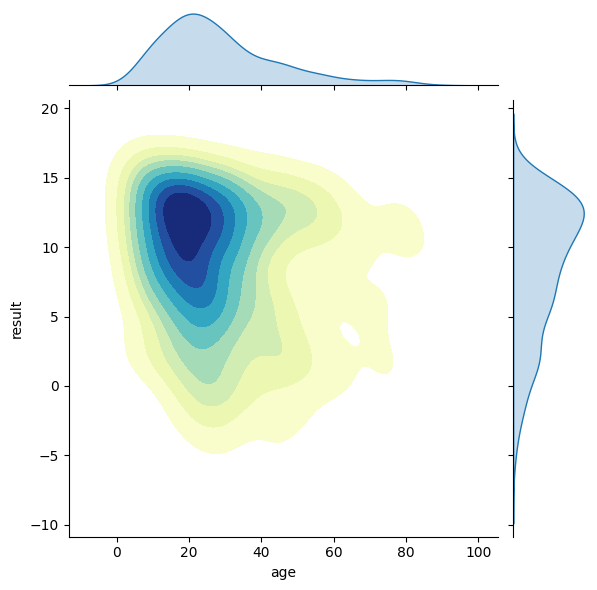

In [97]:
sns.jointplot(x="age", y="result", data=autism_df, cmap="YlGnBu", kind="kde", fill=True)

<AxesSubplot:xlabel='gender', ylabel='Class/ASD'>

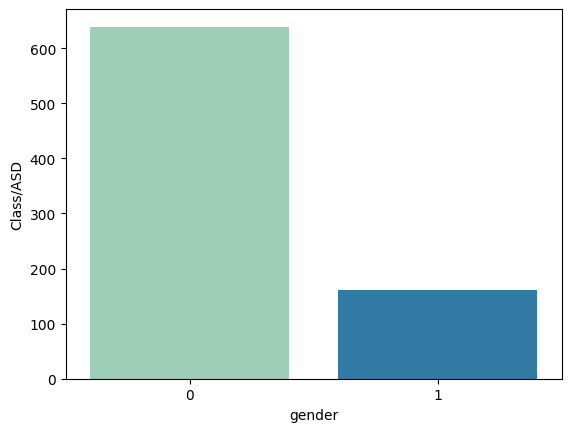

In [51]:
sns.barplot(x="gender", y= autism_df['Class/ASD'].value_counts(), data=autism_df, palette="YlGnBu")

<AxesSubplot:xlabel='Class/ASD', ylabel='result'>

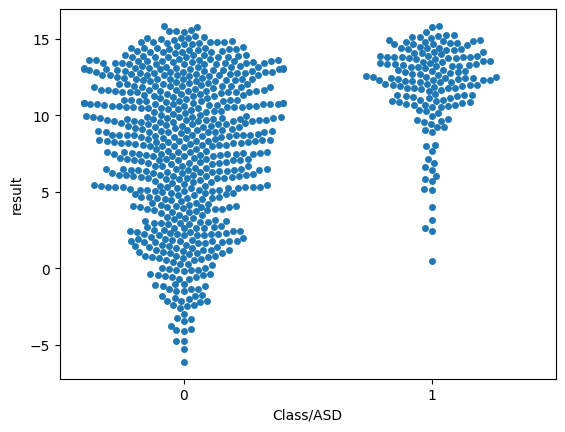

In [ ]:
sns.swarmplot(x='Class/ASD', y='result', data=autism_df)

<AxesSubplot:xlabel='age', ylabel='Count'>

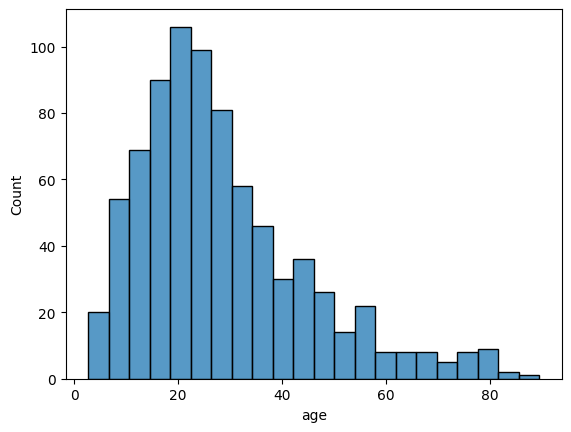

In [ ]:
sns.histplot(autism_df['age'])